In [1]:
import os
import SimpleITK as sitk
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from pathlib import Path


base_path = Path(os.getcwd()).parent / "structured_crohns" / "labels"

In [3]:
coronal_labels_dir = base_path / "coronal"

coronal_labels_path = list(sorted(coronal_labels_dir.glob("*.nii.gz")))

In [4]:
index = 0
coronal_label_path = coronal_labels_path[index]
print("Inspecting coronal label: ", coronal_label_path.name)

Inspecting coronal label:  A101_CORONAL_T2_SEG.nii.gz


In [5]:
coronal_label_path

PosixPath('/Users/frankfan/Learn/Imperial/final-year-project/software_archive/structured_crohns/labels/coronal/A101_CORONAL_T2_SEG.nii.gz')

In [6]:
sitk_coronal_label = sitk.ReadImage(str(coronal_label_path))

data = sitk.GetArrayFromImage(sitk_coronal_label)

In [7]:
data.shape

(37, 384, 306)

In [8]:
np.unique(data)

array([0., 1., 2.])

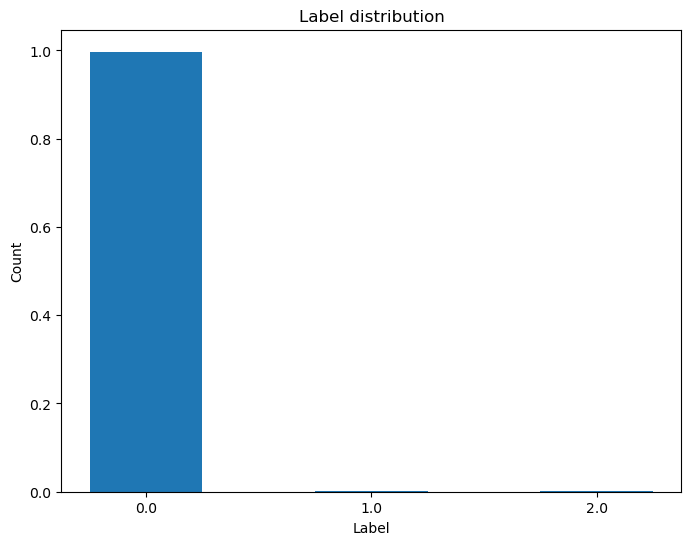

In [9]:
labels, counts = np.unique(data, return_counts=True)

fig, ax = plt.subplots(figsize=(8, 6))
# convert to percentage
counts = counts / np.sum(counts)
ax.bar(labels, counts, align="center", width=0.5)
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.set_title("Label distribution")
ax.set_xlabel("Label")
ax.set_ylabel("Count")
plt.show()

In [10]:
for label, density in zip(labels, counts):
    print(f"Label: {label}, Density: {density:.4f}")

Label: 0.0, Density: 0.9970
Label: 1.0, Density: 0.0015
Label: 2.0, Density: 0.0015


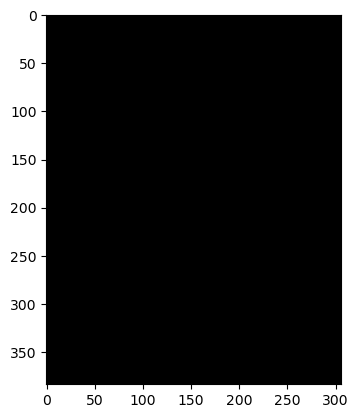

In [11]:
plt.imshow(data[3, :, :], cmap="gray")

In [12]:
counts_all = {}

for label_path in coronal_labels_path:
    sitk_label = sitk.ReadImage(str(label_path))
    data = sitk.GetArrayFromImage(sitk_label)
    labels, counts = np.unique(data, return_counts=True)
    print(f"Label path: {label_path.name}")
    print(labels, counts)
    for label in labels:
        counts_idx = np.where(labels == label)[0][0]
        print(f"Label: {label}, Count: {counts[counts_idx]}")
        if label not in counts_all:
            counts_all[label] = counts[counts_idx]
        else:
            counts_all[label] += counts[counts_idx]

# convert to percentage
counts_all = {k: v / np.sum(list(counts_all.values())) for k, v in counts_all.items()}
counts_all

Label path: A101_CORONAL_T2_SEG.nii.gz
[0. 1. 2.] [4334628    6670    6350]
Label: 0.0, Count: 4334628
Label: 1.0, Count: 6670
Label: 2.0, Count: 6350
Label path: A102_CORONAL_T2_SEG.nii.gz
[0. 1. 2.] [7801563   13610   18427]
Label: 0.0, Count: 7801563
Label: 1.0, Count: 13610
Label: 2.0, Count: 18427
Label path: A103_CORONAL_T2_SEG.nii.gz
[0. 1. 2.] [9186658   20939    8403]
Label: 0.0, Count: 9186658
Label: 1.0, Count: 20939
Label: 2.0, Count: 8403
Label path: A104_CORONAL_T2_SEG.nii.gz
[0. 1.] [10355203    12797]
Label: 0.0, Count: 10355203
Label: 1.0, Count: 12797
Label path: A105_CORONAL_T2_SEG.nii.gz
[0. 1.] [10972871    37177]
Label: 0.0, Count: 10972871
Label: 1.0, Count: 37177
Label path: A106_CORONAL_T2_SEG.nii.gz
[0. 1.] [11003719     6329]
Label: 0.0, Count: 11003719
Label: 1.0, Count: 6329
Label path: A107_CORONAL_T2_SEG.nii.gz
[0. 1.] [9953379    8093]
Label: 0.0, Count: 9953379
Label: 1.0, Count: 8093
Label path: A108_CORONAL_T2_SEG.nii.gz
[0. 1.] [9952345    9127]
Labe

{0.0: 0.9985179863506799,
 1.0: 0.0012977244961946642,
 2.0: 0.00018428915312546825}

In [13]:
print(counts_all.keys())

dict_keys([0.0, 1.0, 2.0])


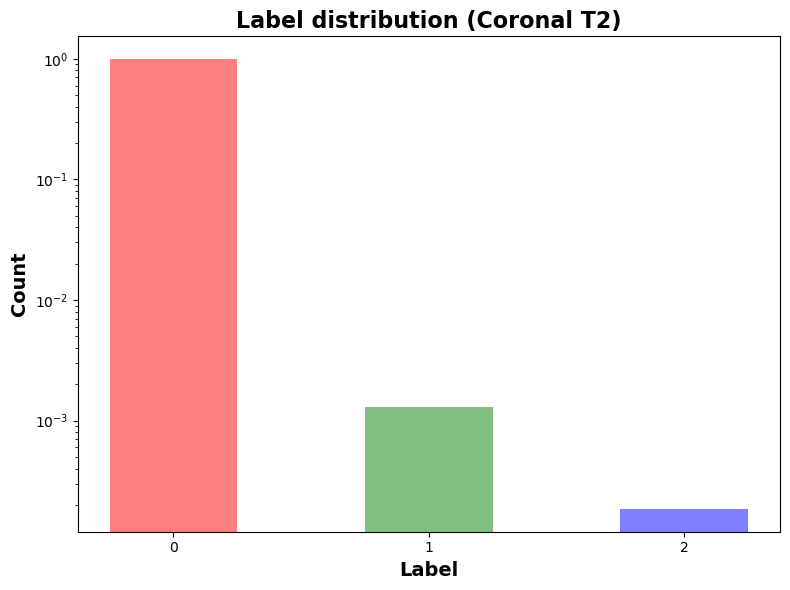

In [14]:
# label distribution in log scale
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(counts_all.keys(), counts_all.values(), align="center", width=0.5, alpha=0.5, color=['r', 'g', 'b'])
ax.set_xticks(list(counts_all.keys()))
ax.set_title("Label distribution (Coronal T2)", fontsize=16, fontweight="bold")
ax.set_xlabel("Label", fontsize=14, fontweight="bold")
ax.set_ylabel("Count", fontsize=14, fontweight="bold")
ax.set_yscale("log")
plt.tight_layout()
plt.show()

In [15]:
axial_t2_labels_dir = base_path / "axial"/ "t2"

counts_all_axial_t2 = {}

for label_path in axial_t2_labels_dir.glob("*.nii.gz"):
    data = sitk.GetArrayFromImage(sitk.ReadImage(str(label_path)))
    labels, counts = np.unique(data, return_counts=True)

    for label in labels:
        counts_idx = np.where(labels == label)[0][0]
        if label not in counts_all_axial_t2:
            counts_all_axial_t2[label] = counts[counts_idx]
        else:
            counts_all_axial_t2[label] += counts[counts_idx]

# convert to percentage
counts_all_axial_t2 = {k: v / np.sum(list(counts_all_axial_t2.values())) for k, v in counts_all_axial_t2.items()}

In [16]:
counts_all_axial_t2

{0: 0.9958190256640127,
 1: 0.0006337111891414032,
 3: 0.003459667729254471,
 6: 1.962634732953176e-05,
 2: 5.812044020962001e-05,
 4: 9.848630052261461e-06}

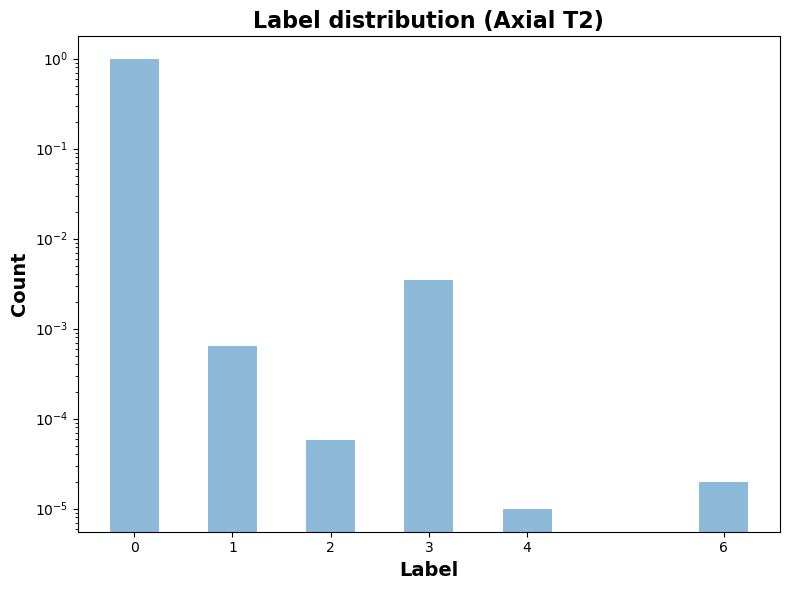

In [17]:
# label distribution in log scale
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(counts_all_axial_t2.keys(), counts_all_axial_t2.values(), align="center", width=0.5, alpha=0.5)
ax.set_xticks(list(counts_all_axial_t2.keys()))
ax.set_title("Label distribution (Axial T2)", fontsize=16, fontweight="bold")
ax.set_xlabel("Label", fontsize=14, fontweight="bold")
ax.set_ylabel("Count", fontsize=14, fontweight="bold")
ax.set_yscale("log")
plt.tight_layout()
plt.show()

In [18]:
axial_postcontrast_labels_dir = base_path / "axial"/ "postcon"

counts_all_axial_postcontrast = {}

for label_path in axial_postcontrast_labels_dir.glob("*.nii.gz"):
    data = sitk.GetArrayFromImage(sitk.ReadImage(str(label_path)))
    labels, counts = np.unique(data, return_counts=True)

    for label in labels:
        counts_idx = np.where(labels == label)[0][0]
        if label not in counts_all_axial_postcontrast:
            counts_all_axial_postcontrast[label] = counts[counts_idx]
        else:
            counts_all_axial_postcontrast[label] += counts[counts_idx]

# convert to percentage
counts_all_axial_postcontrast = {k: v / np.sum(list(counts_all_axial_postcontrast.values())) for k, v in counts_all_axial_postcontrast.items()}

In [19]:
counts_all_axial_postcontrast

{0: 0.9964895487140766,
 1: 0.0005515165670738926,
 3: 0.0028683377631544753,
 6: 2.007789062071395e-05,
 2: 6.505435072922411e-05,
 4: 5.464714345113144e-06}

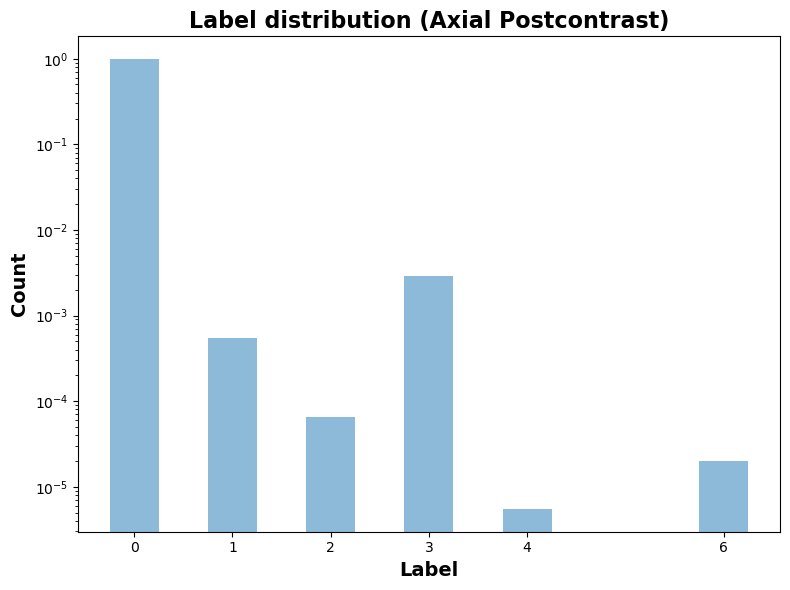

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(counts_all_axial_postcontrast.keys(), counts_all_axial_postcontrast.values(), align="center", width=0.5, alpha=0.5)
ax.set_xticks(list(counts_all_axial_postcontrast.keys()))
ax.set_title("Label distribution (Axial Postcontrast)", fontsize=16, fontweight="bold")
ax.set_xlabel("Label", fontsize=14, fontweight="bold")
ax.set_ylabel("Count", fontsize=14, fontweight="bold")
ax.set_yscale("log")
plt.tight_layout()
plt.show()

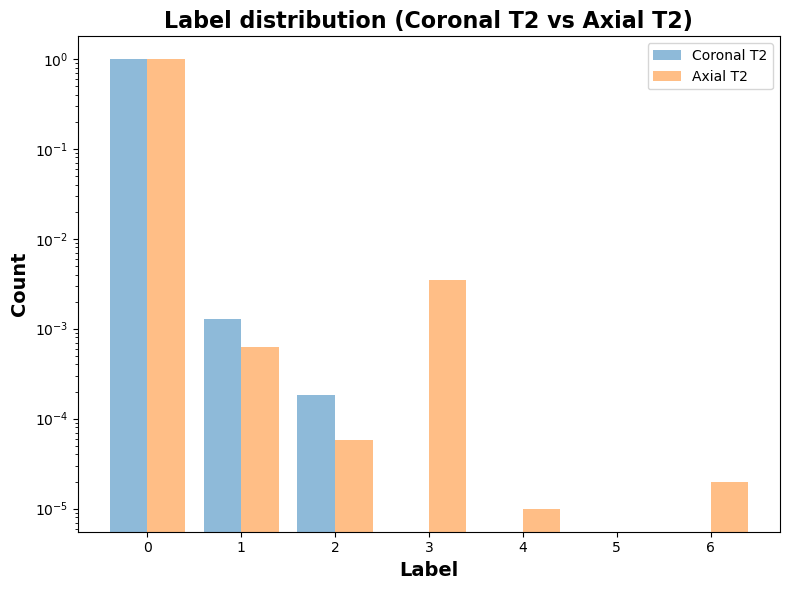

In [24]:
# compare label distribution between coronal T2 and axial T2 side by side
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(np.array(list(counts_all.keys())) - 0.2, counts_all.values(), align="center", width=0.4, alpha=0.5, label="Coronal T2")
ax.bar(np.array(list(counts_all_axial_t2.keys())) + 0.2, counts_all_axial_t2.values(), align="center", width=0.4, alpha=0.5, label="Axial T2")
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_title("Label distribution (Coronal T2 vs Axial T2)", fontsize=16, fontweight="bold")
ax.set_xlabel("Label", fontsize=14, fontweight="bold")
ax.set_ylabel("Count", fontsize=14, fontweight="bold")
ax.set_yscale("log")
ax.legend()
plt.tight_layout()
plt.show()

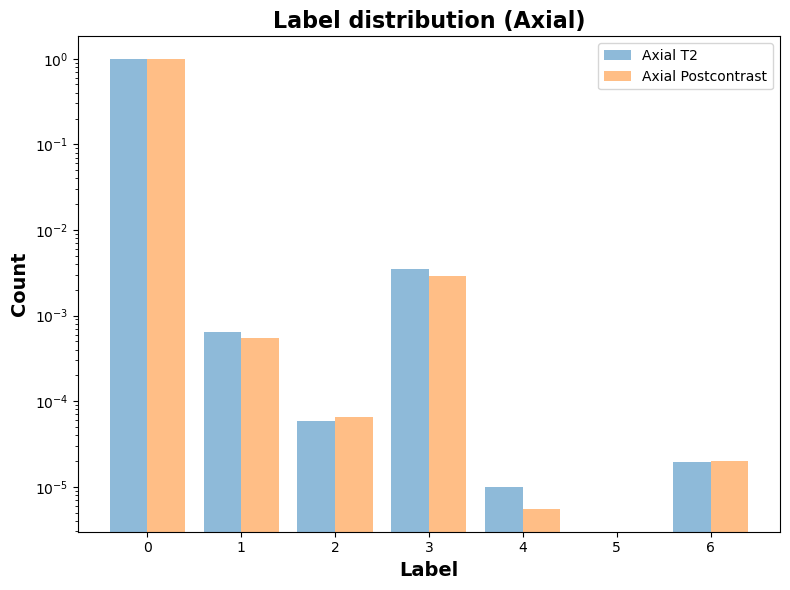

In [22]:
# compare axial t2 and axial postcontrast side by side
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(np.array(list(counts_all_axial_t2.keys())) - 0.2, counts_all_axial_t2.values(), align="center", width=0.4, alpha=0.5, label="Axial T2")
ax.bar(np.array(list(counts_all_axial_postcontrast.keys())) + 0.2, counts_all_axial_postcontrast.values(), align="center", width=0.4, alpha=0.5, label="Axial Postcontrast")
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_title("Label distribution (Axial)", fontsize=16, fontweight="bold")
ax.set_xlabel("Label", fontsize=14, fontweight="bold")
ax.set_ylabel("Count", fontsize=14, fontweight="bold")
ax.set_yscale("log")
ax.legend()
plt.tight_layout()
plt.show()

### To Binary Labels

In [25]:
unique_values_dict = {}
for coronal_label_path in sorted(coronal_labels_path):
    print("Inspecting coronal label: ", coronal_label_path.name)
    # read the image
    sitk_coronal_label = sitk.ReadImage(str(coronal_label_path))
    # convert to numpy array
    data = sitk.GetArrayFromImage(sitk_coronal_label)

    print("Shape: ", data.shape)
    print("Unique values: ", np.unique(data))

    key = tuple(np.unique(data))
    if key not in unique_values_dict:
        unique_values_dict[key] = []
    
    unique_values_dict[key].append(coronal_label_path.name)

Inspecting coronal label:  A101_CORONAL_T2_SEG.nii.gz
Shape:  (37, 384, 306)
Unique values:  [0. 1. 2.]
Inspecting coronal label:  A102_CORONAL_T2_SEG.nii.gz
Shape:  (34, 480, 480)
Unique values:  [0. 1. 2.]
Inspecting coronal label:  A103_CORONAL_T2_SEG.nii.gz
Shape:  (40, 480, 480)
Unique values:  [0. 1. 2.]
Inspecting coronal label:  A104_CORONAL_T2_SEG.nii.gz
Shape:  (45, 480, 480)
Unique values:  [0. 1.]
Inspecting coronal label:  A105_CORONAL_T2_SEG.nii.gz
Shape:  (42, 512, 512)
Unique values:  [0. 1.]
Inspecting coronal label:  A106_CORONAL_T2_SEG.nii.gz
Shape:  (42, 512, 512)
Unique values:  [0. 1.]
Inspecting coronal label:  A107_CORONAL_T2_SEG.nii.gz
Shape:  (38, 512, 512)
Unique values:  [0. 1.]
Inspecting coronal label:  A108_CORONAL_T2_SEG.nii.gz
Shape:  (38, 512, 512)
Unique values:  [0. 1.]
Inspecting coronal label:  A109_CORONAL_T2_SEG.nii.gz
Shape:  (34, 480, 480)
Unique values:  [0. 1.]
Inspecting coronal label:  A110_CORONAL_T2_SEG.nii.gz
Shape:  (38, 512, 512)
Uniqu

In [26]:
unique_values_dict

{(0.0, 1.0, 2.0): ['A101_CORONAL_T2_SEG.nii.gz',
  'A102_CORONAL_T2_SEG.nii.gz',
  'A103_CORONAL_T2_SEG.nii.gz'],
 (0.0, 1.0): ['A104_CORONAL_T2_SEG.nii.gz',
  'A105_CORONAL_T2_SEG.nii.gz',
  'A106_CORONAL_T2_SEG.nii.gz',
  'A107_CORONAL_T2_SEG.nii.gz',
  'A108_CORONAL_T2_SEG.nii.gz',
  'A109_CORONAL_T2_SEG.nii.gz',
  'A110_CORONAL_T2_SEG.nii.gz',
  'A111_CORONAL_T2_SEG.nii.gz',
  'A112_CORONAL_T2_SEG.nii.gz',
  'A113_CORONAL_T2_SEG.nii.gz',
  'I101_CORONAL_T2_SEG.nii.gz',
  'I102_CORONAL_T2_SEG.nii.gz',
  'I103_CORONAL_T2_SEG.nii.gz',
  'I105_CORONAL_T2_SEG.nii.gz',
  'I106_CORONAL_T2_SEG.nii.gz',
  'I107_CORONAL_T2_SEG.nii.gz',
  'I108_CORONAL_T2_SEG.nii.gz',
  'I109_CORONAL_T2_SEG.nii.gz',
  'I110_CORONAL_T2_SEG.nii.gz',
  'I111_CORONAL_T2_SEG.nii.gz',
  'I112_CORONAL_T2_SEG.nii.gz',
  'I113_CORONAL_T2_SEG.nii.gz',
  'I114_CORONAL_T2_SEG.nii.gz',
  'I115_CORONAL_T2_SEG.nii.gz',
  'I116_CORONAL_T2_SEG.nii.gz',
  'I117_CORONAL_T2_SEG.nii.gz',
  'I118_CORONAL_T2_SEG.nii.gz',
  'I119_CO

In [27]:
coronal_binary_labels_base = base_path.parent / "labels_binary"
direction = "coronal"
coronal_binary_labels_dir = coronal_binary_labels_base / direction
if not coronal_binary_labels_dir.exists():
    coronal_binary_labels_dir.mkdir(parents=True)

In [53]:
import shutil
for keys, values in unique_values_dict.items():
    if keys != (0., 1.):
        # rewrite any label > 0 to 1
        for coronal_label_path in values:
            print("Rewriting label: ", coronal_label_path)
            sitk_coronal_label = sitk.ReadImage(str(coronal_labels_dir / coronal_label_path))
            data = sitk.GetArrayFromImage(sitk_coronal_label)
            data[data > 0] = 1
            sitk_coronal_label = sitk.GetImageFromArray(data)
            sitk_coronal_label.CopyInformation(sitk.ReadImage(str(coronal_labels_dir / coronal_label_path)))
            sitk.WriteImage(sitk_coronal_label, str(coronal_binary_labels_dir / coronal_label_path))
    else:
        # copy the label as is
        for coronal_label_path in values:
            print("Copying label: ", coronal_label_path)
            shutil.copy(str(coronal_labels_dir / coronal_label_path), str(coronal_binary_labels_dir / coronal_label_path))

Rewriting label:  A101_CORONAL_T2_SEG.nii.gz
Rewriting label:  A102_CORONAL_T2_SEG.nii.gz
Rewriting label:  A103_CORONAL_T2_SEG.nii.gz
Copying label:  A104_CORONAL_T2_SEG.nii.gz
Copying label:  A105_CORONAL_T2_SEG.nii.gz
Copying label:  A106_CORONAL_T2_SEG.nii.gz
Copying label:  A107_CORONAL_T2_SEG.nii.gz
Copying label:  A108_CORONAL_T2_SEG.nii.gz
Copying label:  A109_CORONAL_T2_SEG.nii.gz
Copying label:  A110_CORONAL_T2_SEG.nii.gz
Copying label:  A111_CORONAL_T2_SEG.nii.gz
Copying label:  A112_CORONAL_T2_SEG.nii.gz
Copying label:  A113_CORONAL_T2_SEG.nii.gz
Copying label:  I101_CORONAL_T2_SEG.nii.gz
Copying label:  I102_CORONAL_T2_SEG.nii.gz
Copying label:  I103_CORONAL_T2_SEG.nii.gz
Copying label:  I105_CORONAL_T2_SEG.nii.gz
Copying label:  I106_CORONAL_T2_SEG.nii.gz
Copying label:  I107_CORONAL_T2_SEG.nii.gz
Copying label:  I108_CORONAL_T2_SEG.nii.gz
Copying label:  I109_CORONAL_T2_SEG.nii.gz
Copying label:  I110_CORONAL_T2_SEG.nii.gz
Copying label:  I111_CORONAL_T2_SEG.nii.gz
Copyi

In [32]:
unique_values_dict_reformatted = {}

for coronal_label_path in sorted(coronal_binary_labels_dir.iterdir()):
    print("Inspecting coronal label: ", coronal_label_path.name)
    # read the image
    sitk_coronal_label = sitk.ReadImage(str(coronal_label_path))
    # convert to numpy array
    data = sitk.GetArrayFromImage(sitk_coronal_label)

    print("Shape: ", data.shape)
    print("Unique values: ", np.unique(data))

    key = tuple(np.unique(data))
    if key not in unique_values_dict_reformatted:
        unique_values_dict_reformatted[key] = []
    
    unique_values_dict_reformatted[key].append(coronal_label_path.name)

Inspecting coronal label:  A101_CORONAL_T2_SEG.nii.gz
Shape:  (37, 384, 306)
Unique values:  [0. 1.]
Inspecting coronal label:  A102_CORONAL_T2_SEG.nii.gz
Shape:  (34, 480, 480)
Unique values:  [0. 1.]
Inspecting coronal label:  A103_CORONAL_T2_SEG.nii.gz
Shape:  (40, 480, 480)
Unique values:  [0. 1.]
Inspecting coronal label:  A104_CORONAL_T2_SEG.nii.gz
Shape:  (45, 480, 480)
Unique values:  [0. 1.]
Inspecting coronal label:  A105_CORONAL_T2_SEG.nii.gz
Shape:  (42, 512, 512)
Unique values:  [0. 1.]
Inspecting coronal label:  A106_CORONAL_T2_SEG.nii.gz
Shape:  (42, 512, 512)
Unique values:  [0. 1.]
Inspecting coronal label:  A107_CORONAL_T2_SEG.nii.gz
Shape:  (38, 512, 512)
Unique values:  [0. 1.]
Inspecting coronal label:  A108_CORONAL_T2_SEG.nii.gz
Shape:  (38, 512, 512)
Unique values:  [0. 1.]
Inspecting coronal label:  A109_CORONAL_T2_SEG.nii.gz
Shape:  (34, 480, 480)
Unique values:  [0. 1.]
Inspecting coronal label:  A110_CORONAL_T2_SEG.nii.gz
Shape:  (38, 512, 512)
Unique values:

In [33]:
unique_values_dict_reformatted

{(0.0, 1.0): ['A101_CORONAL_T2_SEG.nii.gz',
  'A102_CORONAL_T2_SEG.nii.gz',
  'A103_CORONAL_T2_SEG.nii.gz',
  'A104_CORONAL_T2_SEG.nii.gz',
  'A105_CORONAL_T2_SEG.nii.gz',
  'A106_CORONAL_T2_SEG.nii.gz',
  'A107_CORONAL_T2_SEG.nii.gz',
  'A108_CORONAL_T2_SEG.nii.gz',
  'A109_CORONAL_T2_SEG.nii.gz',
  'A110_CORONAL_T2_SEG.nii.gz',
  'A111_CORONAL_T2_SEG.nii.gz',
  'A112_CORONAL_T2_SEG.nii.gz',
  'A113_CORONAL_T2_SEG.nii.gz',
  'I101_CORONAL_T2_SEG.nii.gz',
  'I102_CORONAL_T2_SEG.nii.gz',
  'I103_CORONAL_T2_SEG.nii.gz',
  'I104_CORONAL_T2_SEG.nii.gz',
  'I105_CORONAL_T2_SEG.nii.gz',
  'I106_CORONAL_T2_SEG.nii.gz',
  'I107_CORONAL_T2_SEG.nii.gz',
  'I108_CORONAL_T2_SEG.nii.gz',
  'I109_CORONAL_T2_SEG.nii.gz',
  'I110_CORONAL_T2_SEG.nii.gz',
  'I111_CORONAL_T2_SEG.nii.gz',
  'I112_CORONAL_T2_SEG.nii.gz',
  'I113_CORONAL_T2_SEG.nii.gz',
  'I114_CORONAL_T2_SEG.nii.gz',
  'I115_CORONAL_T2_SEG.nii.gz',
  'I116_CORONAL_T2_SEG.nii.gz',
  'I117_CORONAL_T2_SEG.nii.gz',
  'I118_CORONAL_T2_SEG.nii.g

In [34]:
def inspect_labels(labels_dir):
    unique_values_dict = {}
    for label_path in sorted(labels_dir.iterdir()):
        print("Inspecting label: ", label_path.name)
        # read the image
        sitk_label = sitk.ReadImage(str(label_path))
        # convert to numpy array
        data = sitk.GetArrayFromImage(sitk_label)

        print("Shape: ", data.shape)
        print("Unique values: ", np.unique(data))

        key = tuple(np.unique(data))
        if key not in unique_values_dict:
            unique_values_dict[key] = []
        
        unique_values_dict[key].append(label_path.name)
    return unique_values_dict

In [29]:
axial_t2_unique_values = inspect_labels(coronal_labels_dir.parent / "axial" / "t2")

Inspecting label:  A101_AXIAL_T2_SEG.nii.gz
Shape:  (79, 258, 384)
Unique values:  [0 1 2 3 4 6]
Inspecting label:  A102_AXIAL_T2_SEG.nii.gz
Shape:  (72, 480, 480)
Unique values:  [0 1 2 3 6]
Inspecting label:  A103_AXIAL_T2_SEG.nii.gz
Shape:  (84, 480, 480)
Unique values:  [0 1 2 3 6]
Inspecting label:  A104_AXIAL_T2_SEG.nii.gz
Shape:  (81, 480, 480)
Unique values:  [0 1 3 6]
Inspecting label:  A105_AXIAL_T2_SEG.nii.gz
Shape:  (78, 512, 512)
Unique values:  [0 1 3 6]
Inspecting label:  A106_AXIAL_T2_SEG.nii.gz
Shape:  (78, 512, 512)
Unique values:  [0 1 3]
Inspecting label:  A107_AXIAL_T2_SEG.nii.gz
Shape:  (78, 512, 512)
Unique values:  [0 1 3 6]
Inspecting label:  A108_AXIAL_T2_SEG.nii.gz
Shape:  (86, 512, 512)
Unique values:  [0 1 3]
Inspecting label:  A109_AXIAL_T2_SEG.nii.gz
Shape:  (78, 512, 512)
Unique values:  [0 1 3 6]
Inspecting label:  A110_AXIAL_T2_SEG.nii.gz
Shape:  (78, 512, 512)
Unique values:  [0 1 3]
Inspecting label:  A111_AXIAL_T2_SEG.nii.gz
Shape:  (78, 512, 512)
U

In [35]:
def covert_to_binary_labels(unique_values_dict, labels_dir, binary_labels_dir):
    if not binary_labels_dir.exists():
        binary_labels_dir.mkdir(parents=True)
    for keys, values in unique_values_dict.items():
        if keys != (0., 1.):
            # rewrite any label > 0 to 1
            for label_path in values:
                print("Rewriting label: ", label_path)
                sitk_label = sitk.ReadImage(str(labels_dir / label_path))
                data = sitk.GetArrayFromImage(sitk_label)
                data[data > 0] = 1
                sitk_label = sitk.GetImageFromArray(data)
                sitk_label.CopyInformation(sitk.ReadImage(str(labels_dir / label_path)))
                sitk.WriteImage(sitk_label, str(binary_labels_dir / label_path))
        else:
            # copy the label as is
            for label_path in values:
                print("Copying label: ", label_path)
                shutil.copy(str(labels_dir / label_path), str(binary_labels_dir / label_path))

In [32]:
covert_to_binary_labels(axial_t2_unique_values, coronal_labels_dir.parent / "axial" / "t2", coronal_binary_labels_dir.parent / "axial" / "t2")

Rewriting label:  A101_AXIAL_T2_SEG.nii.gz
Rewriting label:  A102_AXIAL_T2_SEG.nii.gz
Rewriting label:  A103_AXIAL_T2_SEG.nii.gz
Rewriting label:  A104_AXIAL_T2_SEG.nii.gz
Rewriting label:  A105_AXIAL_T2_SEG.nii.gz
Rewriting label:  A107_AXIAL_T2_SEG.nii.gz
Rewriting label:  A109_AXIAL_T2_SEG.nii.gz
Rewriting label:  A111_AXIAL_T2_SEG.nii.gz
Rewriting label:  A113_AXIAL_T2_SEG.nii.gz
Rewriting label:  I102_AXIAL_T2_SEG.nii.gz
Rewriting label:  I103_AXIAL_T2_SEG.nii.gz
Rewriting label:  I105_AXIAL_T2_SEG.nii.gz
Rewriting label:  I107_AXIAL_T2_SEG.nii.gz
Rewriting label:  I108_AXIAL_T2_SEG.nii.gz
Rewriting label:  I109_AXIAL_T2_SEG.nii.gz
Rewriting label:  I111_AXIAL_T2_SEG.nii.gz
Rewriting label:  I112_AXIAL_T2_SEG.nii.gz
Rewriting label:  I113_AXIAL_T2_SEG.nii.gz
Rewriting label:  I115_AXIAL_T2_SEG.nii.gz
Rewriting label:  I116_AXIAL_T2_SEG.nii.gz
Rewriting label:  I117_AXIAL_T2_SEG.nii.gz
Rewriting label:  I118_AXIAL_T2_SEG.nii.gz
Rewriting label:  I120_AXIAL_T2_SEG.nii.gz
Rewriting l

In [33]:
axial_postcon_unique_values = inspect_labels(coronal_labels_dir.parent / "axial" / "postcon")

Inspecting label:  A101_AXIAL_POSTCON_SEG.nii.gz
Shape:  (120, 240, 320)
Unique values:  [0 1 2 3 4 6]
Inspecting label:  A102_AXIAL_POSTCON_SEG.nii.gz
Shape:  (110, 480, 480)
Unique values:  [0 1 2 3 6]
Inspecting label:  A103_AXIAL_POSTCON_SEG.nii.gz
Shape:  (120, 480, 480)
Unique values:  [0 1 2 3 6]
Inspecting label:  A104_AXIAL_POSTCON_SEG.nii.gz
Shape:  (130, 480, 480)
Unique values:  [0 1 3 6]
Inspecting label:  A105_AXIAL_POSTCON_SEG.nii.gz
Shape:  (114, 512, 512)
Unique values:  [0 1 3 6]
Inspecting label:  A106_AXIAL_POSTCON_SEG.nii.gz
Shape:  (114, 512, 512)
Unique values:  [0 1 3]
Inspecting label:  A107_AXIAL_POSTCON_SEG.nii.gz
Shape:  (114, 512, 512)
Unique values:  [0 1 3 6]
Inspecting label:  A108_AXIAL_POSTCON_SEG.nii.gz
Shape:  (114, 512, 512)
Unique values:  [0 1 3]
Inspecting label:  A109_AXIAL_POSTCON_SEG.nii.gz
Shape:  (114, 512, 512)
Unique values:  [0 1 3 6]
Inspecting label:  A110_AXIAL_POSTCON_SEG.nii.gz
Shape:  (114, 512, 512)
Unique values:  [0 1 3]
Inspecti

In [34]:
covert_to_binary_labels(axial_postcon_unique_values, coronal_labels_dir.parent / "axial" / "postcon", coronal_binary_labels_dir.parent / "axial" / "postcon")

Rewriting label:  A101_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  A102_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  A103_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  A104_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  A105_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  A107_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  A109_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  A111_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  A113_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  I102_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  I103_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  I105_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  I107_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  I108_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  I109_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  I111_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  I112_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  I113_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  I117_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  I118_AXIAL_POSTCON_SEG.nii.gz
Rewriting label:  I120_AXIAL_POSTCON_SEG

In [37]:
labels_annotations_dir = coronal_labels_dir.parent.parent / "labels_annotated"

axial_t2_annotated_unique_values = inspect_labels(labels_annotations_dir / "axial")

Inspecting label:  A005_AXIAL_T2_SEG.nii.gz
Shape:  (72, 480, 480)
Unique values:  [0 1 2]
Inspecting label:  A006_AXIAL_T2_SEG.nii.gz
Shape:  (84, 512, 512)
Unique values:  [0 1 2]
Inspecting label:  A008_AXIAL_T2_SEG.nii.gz
Shape:  (72, 432, 432)
Unique values:  [0 1 2]
Inspecting label:  A012_AXIAL_T2_SEG.nii.gz
Shape:  (72, 480, 480)
Unique values:  [0 1 2]
Inspecting label:  A015_AXIAL_T2_SEG.nii.gz
Shape:  (72, 480, 480)
Unique values:  [0 1 2]


In [39]:
covert_to_binary_labels(axial_t2_annotated_unique_values, labels_annotations_dir / "axial", coronal_binary_labels_dir.parent / "axial" / "t2")

Rewriting label:  A005_AXIAL_T2_SEG.nii.gz
Rewriting label:  A006_AXIAL_T2_SEG.nii.gz
Rewriting label:  A008_AXIAL_T2_SEG.nii.gz
Rewriting label:  A012_AXIAL_T2_SEG.nii.gz
Rewriting label:  A015_AXIAL_T2_SEG.nii.gz


In [38]:
coronal_t2_annotated_unique_values = inspect_labels(labels_annotations_dir / "coronal")

Inspecting label:  A003_CORONAL_T2_SEG.nii.gz
Shape:  (34, 480, 480)
Unique values:  [0 1 2]
Inspecting label:  A010_CORONAL_T2_SEG.nii.gz
Shape:  (38, 512, 512)
Unique values:  [0 1 2]
Inspecting label:  A013_CORONAL_T2_SEG.nii.gz
Shape:  (40, 512, 512)
Unique values:  [0 1 2]
Inspecting label:  A016_CORONAL_T2_SEG.nii.gz
Shape:  (45, 512, 512)
Unique values:  [0 1 2]
Inspecting label:  A018_CORONAL_T2_SEG.nii.gz
Shape:  (40, 512, 512)
Unique values:  [0 1 2]
Inspecting label:  I001_CORONAL_T2_SEG.nii.gz
Shape:  (34, 512, 512)
Unique values:  [0 2]
Inspecting label:  I002_CORONAL_T2_SEG.nii.gz
Shape:  (34, 480, 480)
Unique values:  [0 2]
Inspecting label:  I003_CORONAL_T2_SEG.nii.gz
Shape:  (34, 480, 480)
Unique values:  [0 2]
Inspecting label:  I005_CORONAL_T2_SEG.nii.gz
Shape:  (36, 720, 720)
Unique values:  [0 2]
Inspecting label:  I006_CORONAL_T2_SEG.nii.gz
Shape:  (38, 720, 720)
Unique values:  [0 2]
Inspecting label:  I009_CORONAL_T2_SEG.nii.gz
Shape:  (34, 480, 480)
Unique valu

In [52]:
covert_to_binary_labels(coronal_t2_annotated_unique_values, labels_annotations_dir / "coronal", coronal_binary_labels_dir.parent / "coronal")

Rewriting label:  A003_CORONAL_T2_SEG.nii.gz
Rewriting label:  A010_CORONAL_T2_SEG.nii.gz
Rewriting label:  A013_CORONAL_T2_SEG.nii.gz
Rewriting label:  A016_CORONAL_T2_SEG.nii.gz
Rewriting label:  A018_CORONAL_T2_SEG.nii.gz
Rewriting label:  I001_CORONAL_T2_SEG.nii.gz
Rewriting label:  I002_CORONAL_T2_SEG.nii.gz
Rewriting label:  I003_CORONAL_T2_SEG.nii.gz
Rewriting label:  I005_CORONAL_T2_SEG.nii.gz
Rewriting label:  I006_CORONAL_T2_SEG.nii.gz
Rewriting label:  I009_CORONAL_T2_SEG.nii.gz
Rewriting label:  I011_CORONAL_T2_SEG.nii.gz
Rewriting label:  I013_CORONAL_T2_SEG.nii.gz
Rewriting label:  I014_CORONAL_T2_SEG.nii.gz
Rewriting label:  I016_CORONAL_T2_SEG.nii.gz


### Orientation

In [40]:
# inspect the direction of the images from path
def compare_direction(img_path, label_path):
    img = sitk.ReadImage(str(img_path))
    label = sitk.ReadImage(str(label_path))
    img_direction = img.GetDirection()
    label_direction = label.GetDirection()
    print("Image direction: ", img_direction)
    print("Label direction: ", label_direction)
    if img_direction == label_direction:
        print("Directions match")
    else:
        print("Directions do not match")

In [55]:
def compare_geometry(img_path, label_path):
    img = sitk.ReadImage(str(img_path))
    label = sitk.ReadImage(str(label_path))

    img_origin = img.GetOrigin()
    label_origin = label.GetOrigin()

    img_spacing = img.GetSpacing()
    label_spacing = label.GetSpacing()

    img_direction = img.GetDirection()
    label_direction = label.GetDirection()

    img_size = img.GetSize()
    label_size = label.GetSize()

    match = True

    if not np.allclose(img_origin, label_origin):
        print("Origins do not match")
        print("Image origin: ", img_origin)
        print("Label origin: ", label_origin)
        match = False

    if not np.allclose(img_spacing, label_spacing):
        print("Spacings do not match")
        print("Image spacing: ", img_spacing)
        print("Label spacing: ", label_spacing)
        match = False

    if not np.allclose(img_direction, label_direction):
        print("Directions do not match")
        print("Image direction: ", img_direction)
        print("Label direction: ", label_direction)
        match = False

    if not np.allclose(img_size, label_size):
        print("Sizes do not match")
        print("Image size: ", img_size)
        print("Label size: ", label_size)
        match = False

    if not match:
        print("Image: ", img_path.name)

    return match

In [42]:
def inspect_geometry(img_dir, label_dir):
    for img_path in sorted(img_dir.iterdir()):
        # the label name is image name + "_SEG.nii.gz"
        label_path = label_dir / (img_path.name[:-7] + "_SEG.nii.gz")
        if label_path.exists():
            compare_geometry(img_path, label_path)

In [43]:
inspect_geometry(coronal_labels_dir.parent.parent / "images" / "axial" / "t2", coronal_binary_labels_dir.parent / "axial" / "t2")

Image:  A005_AXIAL_T2.nii.gz
Geometry matches
Image:  A006_AXIAL_T2.nii.gz
Geometry matches
Image:  A008_AXIAL_T2.nii.gz
Geometry matches
Image:  A012_AXIAL_T2.nii.gz
Geometry matches
Image:  A015_AXIAL_T2.nii.gz
Geometry matches
Image:  A101_AXIAL_T2.nii.gz
Geometry matches
Image:  A102_AXIAL_T2.nii.gz
Geometry matches
Image:  A103_AXIAL_T2.nii.gz
Geometry matches
Image:  A104_AXIAL_T2.nii.gz
Geometry matches
Image:  A105_AXIAL_T2.nii.gz
Geometry matches
Image:  A106_AXIAL_T2.nii.gz
Geometry matches
Image:  A107_AXIAL_T2.nii.gz
Geometry matches
Image:  A108_AXIAL_T2.nii.gz
Geometry matches
Image:  A109_AXIAL_T2.nii.gz
Geometry matches
Image:  A110_AXIAL_T2.nii.gz
Geometry matches
Image:  A111_AXIAL_T2.nii.gz
Geometry matches
Image:  A112_AXIAL_T2.nii.gz
Geometry matches
Image:  A113_AXIAL_T2.nii.gz
Geometry matches
Image:  I101_AXIAL_T2.nii.gz
Geometry matches
Image:  I102_AXIAL_T2.nii.gz
Geometry matches
Image:  I103_AXIAL_T2.nii.gz
Geometry matches
Image:  I104_AXIAL_T2.nii.gz
Geome

In [59]:
def correct_direction(img_path, label_path):
    img = sitk.ReadImage(str(img_path))
    label = sitk.ReadImage(str(label_path))

    img_direction = img.GetDirection()
    label_direction = label.GetDirection()

    if not np.allclose(img_direction, label_direction):
        # correct the label direction using resample
        print("Correcting label direction for: ", label_path.name)
        new_label = sitk.GetImageFromArray(sitk.GetArrayFromImage(label))

        new_label.SetOrigin(label.GetOrigin())
        new_label.SetSpacing(label.GetSpacing())

        new_label.SetDirection(img_direction)
        # write the label
        sitk.WriteImage(new_label, str(label_path))

In [17]:
correct_direction(
    coronal_labels_dir.parent.parent / "images" / "axial" / "t2" / "A006_AXIAL_T2.nii.gz",
    coronal_binary_labels_dir.parent / "axial" / "t2" / "A006_AXIAL_T2_SEG.nii.gz"
)

In [18]:
compare_geometry(
    coronal_labels_dir.parent.parent / "images" / "axial" / "t2" / "A006_AXIAL_T2.nii.gz",
    coronal_binary_labels_dir.parent / "axial" / "t2" / "A006_AXIAL_T2_SEG.nii.gz"
)

Geometry matches


In [45]:
def correct_directions(img_dir, label_dir):
    for img_path in sorted(img_dir.iterdir()):
        # the label name is image name + "_SEG.nii.gz"
        label_path = label_dir / (img_path.name[:-7] + "_SEG.nii.gz")
        if label_path.exists():
            correct_direction(img_path, label_path)

In [20]:
correct_directions(
    coronal_labels_dir.parent.parent / "images" / "axial" / "t2",
    coronal_binary_labels_dir.parent / "axial" / "t2"
)

In [23]:
inspect_geometry(
    coronal_labels_dir.parent.parent / "images" / "axial" / "postcon",
    coronal_binary_labels_dir.parent / "axial" / "postcon"
)

Image:  A101_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A102_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A103_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A104_AXIAL_POSTCON.nii.gz
Directions do not match
Image direction:  (0.9993970418422747, -0.029874416345212405, 0.017693840170523327, 0.03094774630880544, 0.9974786579128233, -0.06386364258781184, -0.015741339057285142, 0.06437271360184901, 0.9978017654701942)
Label direction:  (0.9993970136002068, -0.029875344772192152, 0.01769386749196504, 0.030948674825143737, 0.9974786287933941, -0.06386363266336084, -0.01574130660254881, 0.06437273394219646, 0.9978017656209154)
Image:  A105_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A106_AXIAL_POSTCON.nii.gz
Directions do not match
Image direction:  (0.9996856046203976, -0.025073729076871838, -1.7532028985955296e-12, 0.024971848022669295, 0.9956236027116495, -0.09005581185734039, 0.0022580347832900916, 0.0900274948760382, 0.9959367202542113)
Label direction:  (0.999685527247723, -0.0250

In [24]:
correct_directions(
    coronal_labels_dir.parent.parent / "images" / "axial" / "postcon",
    coronal_binary_labels_dir.parent / "axial" / "postcon"
)

Correcting label direction for:  A104_AXIAL_POSTCON_SEG.nii.gz
Correcting label direction for:  A106_AXIAL_POSTCON_SEG.nii.gz
Correcting label direction for:  A107_AXIAL_POSTCON_SEG.nii.gz
Correcting label direction for:  A112_AXIAL_POSTCON_SEG.nii.gz
Correcting label direction for:  A113_AXIAL_POSTCON_SEG.nii.gz
Correcting label direction for:  I108_AXIAL_POSTCON_SEG.nii.gz
Correcting label direction for:  I111_AXIAL_POSTCON_SEG.nii.gz
Correcting label direction for:  I113_AXIAL_POSTCON_SEG.nii.gz
Correcting label direction for:  I116_AXIAL_POSTCON_SEG.nii.gz
Correcting label direction for:  I118_AXIAL_POSTCON_SEG.nii.gz


In [25]:
inspect_geometry(
    coronal_labels_dir.parent.parent / "images" / "axial" / "postcon",
    coronal_binary_labels_dir.parent / "axial" / "postcon"
)

Image:  A101_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A102_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A103_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A104_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A105_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A106_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A107_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A108_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A109_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A110_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A111_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A112_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  A113_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  I101_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  I102_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  I103_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  I104_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  I105_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  I106_AXIAL_POSTCON.nii.gz
Geometry matches
Image:  I107_AXIAL_POSTCON.nii.

In [60]:
inspect_geometry(
    coronal_labels_dir.parent.parent / "images" / "coronal",
    coronal_binary_labels_dir.parent / "coronal"
)

Origins do not match
Image origin:  (0.0, 0.0, 0.0)
Label origin:  (-178.53228759765625, -70.2840576171875, 199.4116668701172)
Spacings do not match
Image spacing:  (1.0, 1.0, 1.0)
Label spacing:  (0.84375, 0.84375, 4.399999618530273)
Directions do not match
Image direction:  (0.9996398176781983, 0.0, -0.026837192705244498, 0.026837192705244498, 0.0, 0.9996398176781983, 0.0, -1.0, 0.0)
Label direction:  (0.9996398450857488, 1.0198211923658856e-06, -0.02683617145480946, 0.026836171781759434, 1.3686513124472409e-08, 0.9996398450950463, 1.0198211727427216e-06, -0.9999999999994799, -1.3686512033174391e-08)
Image:  A003_CORONAL_T2.nii.gz
Directions do not match
Image direction:  (1.0, 0.0, 0.0, 0.0, -0.0, 1.0, 0.0, -1.0, 0.0)
Label direction:  (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
Image:  A101_CORONAL_T2.nii.gz
Directions do not match
Image direction:  (1.0, 0.0, 0.0, 0.0, -0.0, 1.0, 0.0, -1.0, 0.0)
Label direction:  (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
Image:  A102_COR

In [61]:
correct_directions(
    coronal_labels_dir.parent.parent / "images" / "coronal",
    coronal_binary_labels_dir.parent / "coronal"
)

Correcting label direction for:  A003_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  A101_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  A102_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  A103_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  A104_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  A105_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  A106_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  A107_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  A108_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  A109_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  A110_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  A111_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  A112_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  A113_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  I003_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  I005_CORONAL_T2_SEG.nii.gz
Correcting label direction for:  I006_CO

In [62]:
inspect_geometry(
    coronal_labels_dir.parent.parent / "images" / "coronal",
    coronal_binary_labels_dir.parent / "coronal"
)

Origins do not match
Image origin:  (0.0, 0.0, 0.0)
Label origin:  (-178.53228759765625, -70.2840576171875, 199.4116668701172)
Spacings do not match
Image spacing:  (1.0, 1.0, 1.0)
Label spacing:  (0.84375, 0.84375, 4.399999618530273)
Image:  A003_CORONAL_T2.nii.gz
Origins do not match
Image origin:  (0.0, 0.0, 0.0)
Label origin:  (-187.13754272460938, -58.9073371887207, 208.877685546875)
Spacings do not match
Image spacing:  (1.0, 1.0, 1.0)
Label spacing:  (0.84375, 0.84375, 4.399999141693115)
Image:  I003_CORONAL_T2.nii.gz
Origins do not match
Image origin:  (0.0, 0.0, 0.0)
Label origin:  (-175.69540405273438, -79.44647216796875, 194.7180633544922)
Spacings do not match
Image spacing:  (1.0, 1.0, 1.0)
Label spacing:  (0.5208333134651184, 0.5208333134651184, 3.3000049591064453)
Image:  I005_CORONAL_T2.nii.gz
Origins do not match
Image origin:  (0.0, 0.0, 0.0)
Label origin:  (-174.56900024414062, -104.18670654296875, 188.55226135253906)
Spacings do not match
Image spacing:  (1.0, 1.0, 

In [51]:
compare_geometry(
    coronal_labels_dir.parent.parent / "images" / "coronal" / "A003_CORONAL_T2.nii.gz",
    coronal_binary_labels_dir.parent / "coronal" / "A003_CORONAL_T2_SEG.nii.gz"
)

True

In [63]:
def correct_geometry(img_path, label_path):
    img = sitk.ReadImage(str(img_path))
    label = sitk.ReadImage(str(label_path))

    if not compare_geometry(img_path, label_path):
        # correct the label direction using resample
        print("Correcting geometry for: ", label_path.name)
        label.SetOrigin((0.0, 0.0, 0.0))
        label.SetSpacing((1.0, 1.0, 1.0))
        
        img.SetOrigin((0.0, 0.0, 0.0))
        img.SetSpacing((1.0, 1.0, 1.0))
        
        img_direction = img.GetDirection()
        resample_transform = sitk.Transform(3, sitk.sitkIdentity)
        resample_transform.SetParameters(img_direction)
        # resample the label
        label = sitk.Resample(label, img, resample_transform, sitk.sitkNearestNeighbor, 0.0, label.GetPixelID())
        # write the label
        sitk.WriteImage(label, str(label_path))
        # write the image
        sitk.WriteImage(img, str(img_path))

In [31]:
correct_geometry(
    coronal_labels_dir.parent.parent / "images" / "coronal" / "I108_CORONAL_T2.nii.gz",
    coronal_binary_labels_dir.parent / "coronal" / "I108_CORONAL_T2_SEG.nii.gz"
)

Image:  I108_CORONAL_T2.nii.gz
Origins do not match
Image origin:  (-208.1724395751953, -88.6630859375, 201.2852020263672)
Label origin:  (0.0, 0.0, 0.0)
Correcting geometry for:  I108_CORONAL_T2_SEG.nii.gz


In [33]:
compare_geometry(
    coronal_labels_dir.parent.parent / "images" / "coronal" / "I108_CORONAL_T2.nii.gz",
    coronal_binary_labels_dir.parent / "coronal" / "I108_CORONAL_T2_SEG.nii.gz"
)

Image:  I108_CORONAL_T2.nii.gz
Geometry matches


True

In [64]:
def correct_geometries(img_dir, label_dir):
    for img_path in sorted(img_dir.iterdir()):
        # the label name is image name + "_SEG.nii.gz"
        label_path = label_dir / (img_path.name[:-7] + "_SEG.nii.gz")
        if label_path.exists():
            correct_geometry(img_path, label_path)

In [65]:
correct_geometries(
    coronal_labels_dir.parent.parent / "images" / "coronal",
    coronal_binary_labels_dir.parent / "coronal"
)

Origins do not match
Image origin:  (0.0, 0.0, 0.0)
Label origin:  (-178.53228759765625, -70.2840576171875, 199.4116668701172)
Spacings do not match
Image spacing:  (1.0, 1.0, 1.0)
Label spacing:  (0.84375, 0.84375, 4.399999618530273)
Image:  A003_CORONAL_T2.nii.gz
Correcting geometry for:  A003_CORONAL_T2_SEG.nii.gz
Origins do not match
Image origin:  (0.0, 0.0, 0.0)
Label origin:  (-187.13754272460938, -58.9073371887207, 208.877685546875)
Spacings do not match
Image spacing:  (1.0, 1.0, 1.0)
Label spacing:  (0.84375, 0.84375, 4.399999141693115)
Image:  I003_CORONAL_T2.nii.gz
Correcting geometry for:  I003_CORONAL_T2_SEG.nii.gz
Origins do not match
Image origin:  (0.0, 0.0, 0.0)
Label origin:  (-175.69540405273438, -79.44647216796875, 194.7180633544922)
Spacings do not match
Image spacing:  (1.0, 1.0, 1.0)
Label spacing:  (0.5208333134651184, 0.5208333134651184, 3.3000049591064453)
Image:  I005_CORONAL_T2.nii.gz
Correcting geometry for:  I005_CORONAL_T2_SEG.nii.gz
Origins do not match

In [66]:
inspect_geometry(
    coronal_labels_dir.parent.parent / "images" / "coronal",
    coronal_binary_labels_dir.parent / "coronal"
)

In [68]:
base_path = base_path.parent.parent

In [69]:
base_path

PosixPath('/Users/frankfan/Learn/Imperial/final-year-project/software_archive')

In [70]:
crohns_data_path = base_path / "processed_crohns"

In [71]:
inspect_geometry(
    crohns_data_path / "Crohns2023Coronal",
    crohns_data_path / "Crohns2023CoronalLabels"
)

In [72]:
inspect_geometry(
    crohns_data_path / "Crohns2023Axial",
    crohns_data_path / "Crohns2023AxialLabels"
)